# <b>A. <span style='color:#0B2F9F'><code>PREFIX</code></span></b>
Prefix merupakan penggunaan awalan pada nama tabel untuk memberikan informasi tambahan atau untuk mengelompokkan objek-objek tertentu. Sebagai contoh perhatikan gambar berikut : <br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20Prefix.png" width="50%">

<br><br>
Nama tabel dimisalkan (diberi alias) sebagai tbl, lalu untuk mengakses kolom pada tabel tersebut bisa diberi prefix tbl.kolom1 dan seterusnya

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ambil kolom customer_id, gender, age dan married namun gunakan alias 'cdm' pada nama tabel dan sematkan prefixnya saat mengakses kolom!</b></i>

In [ ]:
SELECT
  cdm.customer_id,
  cdm.gender,
  cdm.age,
  cdm.married
FROM `telco_churn.customer_demography` AS cdm;

customer_id,gender,age,married
8779-QRDMV,Male,78,No
7495-OOKFY,Female,74,Yes
1658-BYGOY,Male,71,No
4598-XLKNJ,Female,78,Yes
4846-WHAFZ,Female,80,Yes
4412-YLTKF,Female,72,No
0390-DCFDQ,Female,76,Yes
3445-HXXGF,Male,66,Yes
2656-FMOKZ,Female,70,No
2070-FNEXE,Female,77,No


# <b>B. <span style='color:#0B2F9F'><code>JOIN</code></span></b>

Data biasanya disimpan di berbagai tabel atau sistem yang berbeda pada RDBMS (Relational Database Management System). JOIN memungkinkan pengguna untuk menggabungkan data dari berbagai sumber untuk mendapatkan gambaran yang lebih lengkap. Memahami query JOIN memungkinkan seorang pengguna untuk mengintegrasikan dan menganalisis data secara efektif, sehingga dapat meningkatkan kualitas analisis dan mendukung pengambilan keputusan berbasis data.

Operasi JOIN standar dapat dilakukan jika terdapat kunci pada tiap tabel yang saling terhubung. Operasi join dasar yang paling umum digunakan ada 4 yakni :
<ul>
    <li><b>LEFT JOIN</b></li>
    LEFT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kiri (tabel pertama) dan baris yang cocok dari tabel kanan (tabel kedua). Jika tidak ada kecocokan di tabel kanan, maka nilai-nilai untuk kolom dari tabel kanan akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/left-join-extra.gif" width="20%">
    <br><br>
    <li><b>RIGHT JOIN</b></li>
    RIGHT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kanan (tabel kedua) dan baris yang cocok dari tabel kiri (tabel pertama). Jika tidak ada kecocokan di tabel kiri, maka nilai-nilai untuk kolom dari tabel kiri akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/right-join.gif" width="20%">
    <br><br>
    <li><b>INNER JOIN</b></li>
    INNER JOIN adalah jenis operasi penggabungan yang hanya mengembalikan baris yang memiliki kecocokan di kedua tabel berdasarkan kriteria tertentu.<br><br>
    <img src="https://thomasadventure.blog/img/inner-join.gif" width="20%">
    <br><br>
     <li><b>FULL JOIN</b></li>
    FULL JOIN adalah jenis operasi penggabungan semua baris dari kedua tabel, baik yang memiliki kecocokan maupun yang tidak. Dengan demikian, hasilnya akan mencakup semua data dari tabel kiri dan tabel kanan.<br><br>
    <img src="https://thomasadventure.blog/img/full-join.gif" width="20%">
    <br><br>
</ul>

#### <i><b><span style='color:#55679C'>Pre-Quest</span>
Untuk melakukan join biasanya akan lebih mudah jika arsitektur relasi antar tabel atau biasa dikenal ERD (Entity Relational Diagram) telah dibuat atau diketahui. Pada data telco churn ERD-nya disajikan pada gambar berikut<br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/ERD%20-%20Telco%20Churn.png" width="40%">

#### <i><b><span style='color:#55679C'>Quest : </span>Hitung berapa rata-rata biaya bulanan tiap status customer! Tampilkan status, total_customer, avg_monthly_charge! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  cs.status,
  COUNT(cs.customer_id) AS total_customer,
  ROUND(AVG(ts.monthly_charge), 2) AS avg_monthly_charge
FROM `telco_churn.customer_status` AS cs
INNER JOIN `telco_churn.telco_services` AS ts ON cs.customer_id = ts.customer_id
GROUP BY cs.status;

status,total_customer,avg_monthly_charge
Churned,1869,74.44
Joined,454,43.47
Stayed,4720,62.98


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
1. Berdasarkan hasil analisa data, diperoleh bahwa total customer "Churned" lebih sedikit daripada yang "Stayed" namun rata2 biaya bulanan nya justru lebih besar
2. Terdapat kemungkinan bahwa biaya yang dibebankan kepada yang Churned lebih besar daripada yang Stayed (perlu dikaitkan dengan jenis layanan yang digunakan)
3. Terdapat kemungkinan bahwa terjadi penurunan kualitas dari produk sehingga customer Churned (perlu dikaitkan dengan alasan churned)
4. Rekomendasi yang saat ini bisa diberikan adalah menjaga customer yang Stayed agar tidak Churned dengan peningkatan layanan dsb, serta bisa memberikan penawaran kembali pada konsumen yang Churned dengan perbaikan yang telah dilakukan, sehingga bisa mengalihkan status Churned menjadi Joined

#### <i><b><span style='color:#55679C'>Quest : </span>Coba Sudut Pandang Lebih Luas; Hitung berapa banyak customer, rata-rata biaya bulanan & rata-rata umur tiap status customer, gender dan status pernikahannya! Tampilkan status, gender, married, total_customer, avg_monthly_charge! Urutkan hasilnya per metrik perhitungan dan Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  cs.status,
  cdm.gender,
  cdm.married,
  COUNT(cs.customer_id) AS total_customer,
  ROUND(AVG(cdm.age), 2) AS avg_age,
  ROUND(AVG(ts.monthly_charge), 2) AS avg_monthly_charge
FROM `telco_churn.customer_status` AS cs
INNER JOIN `telco_churn.telco_services` AS ts ON cs.customer_id = ts.customer_id
INNER JOIN `telco_churn.customer_demography` AS cdm ON cs.customer_id = cdm.customer_id
GROUP BY cs.status, cdm.gender, cdm.married
ORDER BY total_customer, avg_monthly_charge, avg_age;

status,gender,married,total_customer,avg_monthly_charge
Churned,Female,Yes,319,78.0
Churned,Female,No,620,73.17
Churned,Male,Yes,350,81.45
Churned,Male,No,580,69.61
Joined,Female,Yes,46,43.75
Joined,Female,No,165,43.47
Joined,Male,Yes,38,48.11
Joined,Male,No,205,42.55
Stayed,Female,Yes,1323,64.67
Stayed,Female,No,1015,61.51


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
1. Berdasarkan gender terlihat bahwa:
- kategori Stayed laki2 & perempuan seimbang
- kategori Churned pada laki2 lebih banyak daripada perempuan, terutama untuk yang belum menikah
2. Berdasarkan "Married", terlihat bahwa:
- biaya bulanan yang sudah menikah cenderung lebih tinggi daripada yang belum menikah baik yang "Stayed" maupun yang "Churned"
3. Pelanggan yang Churned cenderung memiliki biaya bulanan yang lebih tinggi daripada yang Stayed
4. Pelanggan yang Churned cenderung memiliki usia yang lebih tua daripada yang Stayed
5. Rekomendasi untuk saat ini:
- mengidentifikasi polanya lebih lanjut penyebab pelanggan Churned dikaitkan dengan usia, gender, penggunaan produk
- melakukan survei kepuasan pelanggan dan meningkatkan kualitas berdasarkan hasil survei
- melakukan analisa terkait biaya langganan yang cukup tinggi sehingga bisa melakukan penyesuaian harga penawaran
- melakukan analisa data secara berkala


#### <i><b><span style='color:#55679C'>Quest : </span>Bagaimana dengan total tenure ? Hitung berapa rata-rata tenure_in_month tiap status customer! Tampilkan status, total_customer, avg_tenure_in_month! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  cs.status,
  COUNT(cs.customer_id) AS total_customer,
  ROUND(AVG(ts.tenure_in_months),2) AS avg_tenure_in_month
FROM `telco_churn.customer_status` AS cs
INNER JOIN `telco_churn.telco_services` AS ts ON cs.customer_id = ts.customer_id
GROUP BY cs.status;

status,total_customer,avg_tenure_in_month
Churned,1869,17.98
Joined,454,1.72
Stayed,4720,41.04


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
1. Berdasarkan data diperoleh bahwa sebanyak 1869 pelanggan Churned setelah berlangganan selama 17,98 bulan
2. Pelanggan yang Stayed sebanyak 4720 tetap berlangganan selama 41,02 bulan
3. Ada pelanggan yang Joined sekitar 454 selama rata2 1,72 bulan
4. Rekomendasi yang bisa diberikan:
- Melakukan analisa lebih lanjut terkait customer demography, survei kepuasan pelanggan, alasan churned, dsb
- Melakukan identifikasi pada pelanggan yang Churned polanya seperti apa
- Meningkatkan kualitas & pelayanan bagi pelanggan yang Stayed
- Memberikan penawaran menarik bagi pelanggan yang Joined


#### <i><b><span style='color:#55679C'>Quest : </span>Perusahaan telekomunikasi ingin melakukan perluasan market ke beberapa daerah yang mana di daerah tersebut belum ada pelanggan terdaftar dalam database. Buatkan daftar kode pos pada tabel population yang sama sekali belum ada orang yang menggunakan layanan telekomunikasi! Tampilkan kode pos dan jumlah populasinya!

In [ ]:
SELECT
  pop.zip_code,
  pop.population,
  COUNT(loc.customer_id) AS total_costumer
FROM `telco_churn.population` AS pop
LEFT JOIN `telco_churn.customer_location` AS loc ON pop.zip_code = loc.zip_code
GROUP BY pop.zip_code, pop.population
HAVING COUNT(loc.customer_id) = 0;


zip_code,population,total_customer
91402,66249,0
95023,47514,0
90020,42394,0
92307,31876,0
93555,29782,0
95531,23792,0
92277,17178,0
96161,15783,0
93640,9174,0
96064,4592,0


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
1. Dengan menggabungkan antara tabel population dan customer location, diperoleh data bahwa masih terdapat beberapa daerah dengan kode zip tertentu yang masih belum menggunakan layanan telekomunikasi perusahaan ini
2. Potensi bagi perusahaan dalam memperluas jangkauan konsumen terbuka lebar
3. Rekomendasi yang dapat dilakukan:
- Melakukan analisa data secara berkala terkait alasan mengapa daerah tersebut belum ada customer, apakah memang lokasi nya terpencil atau memang promosi belum masuk ke daerah tersebut atau bisa jadi ada kompetitor di daerah tersebut
- Memperluas program promosi dan merancang penawaran yang menarik

#### <i><b><span style='color:#55679C'>Quest 1 : </span> 10 Pelanggan teratas yang paling sering churned dan layanan apa yang sering mereka gunakan? Berikan interpretasinya!

In [ ]:
select
  a.customer_id,
  a.cltv,
  a.status,
  b.internet_service,
  b.phone_service,
  b.streaming_movies,
  b.streaming_music,
  b.streaming_tv
from `telco_churn.customer_status` a
join `telco_churn.telco_services` b on a.customer_id = b.customer_id
where a.status = 'Churned'
order by a.cltv desc
limit 10;

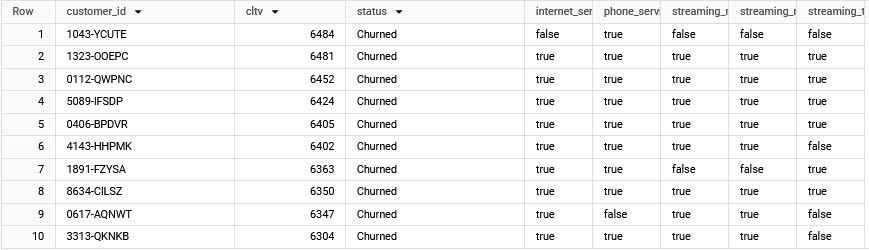

Data Source : <i>https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=samples-telco-customer-churn</i>

---

<br>
<a href="https://www.linkedin.com/in/ika-sulistyaningtiyas-016396100/"><img src="https://img.shields.io/badge/-© 2024 Ika Sulistyaningtiyas-417DAC?style=for-the-badge&logoColor=white"/></a>